# Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importing Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# number of rows and columns
df.shape

(1338, 7)

In [4]:
# chwcking the columns of dataset
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
# checking the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Categorial Features: Sex, Smoker, Region

In [6]:
#getting some nformation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Visualization

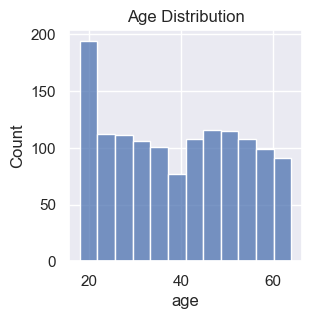

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

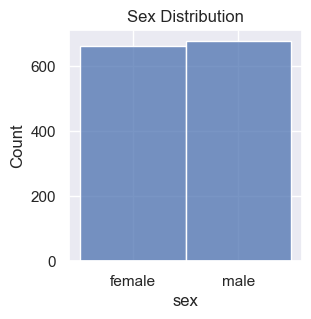

In [10]:
# Gender distribution
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(df['sex'])
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

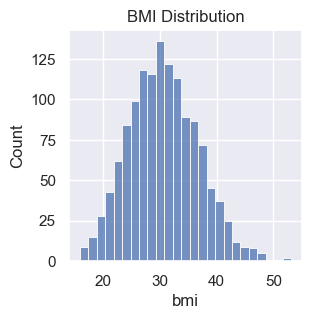

In [12]:
# bmi distribution
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

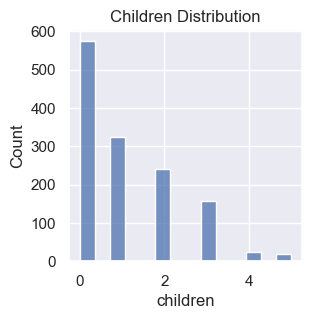

In [13]:
# children distribution
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(df['children'])
plt.title('Children Distribution')
plt.show()

In [14]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

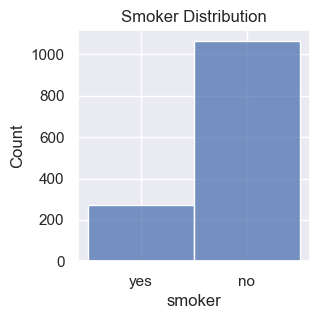

In [15]:
# smoker distribution
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(df['smoker'])
plt.title('Smoker Distribution')
plt.show()

In [16]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

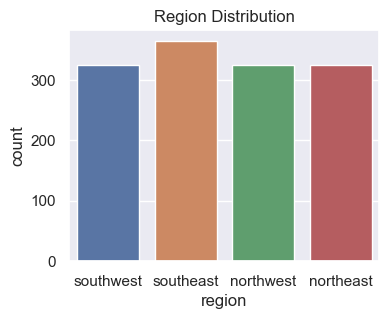

In [28]:
# region distribution
sns.set()
plt.figure(figsize=(4,3))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [29]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

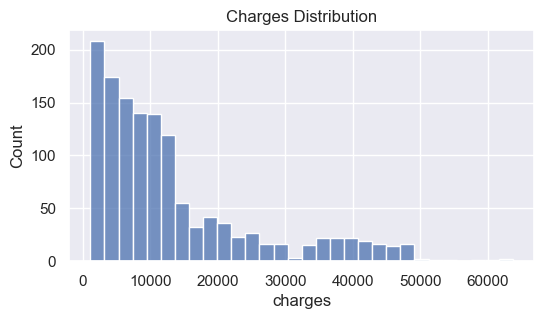

In [19]:
# distribution of charges value
sns.set()
plt.figure(figsize=(6,3))
sns.histplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Encoding the categorical features

In [38]:
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


Spliting the Features and Target

In [39]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [40]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [41]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliting tha data into Training Data & Test Data

In [42]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [44]:
# loading the Linear Regression Model
regressor = LinearRegression()

In [45]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [46]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [47]:
# R square value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R square value :', r2_train)

R square value : 0.751505643411174


In [49]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [50]:
# R square value
r2_test = metrics.r2_score(Y_train, training_data_prediction)
print('R square value :', r2_test)

R square value : 0.751505643411174


Building a Predictive System

In [52]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496048


C:\Users\rakhi\coding folders\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
